In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
flower=pd.read_csv('Iris.csv')

In [187]:
flower.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,3,4.7,3.2,1.3,0.2,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
143,144,6.8,3.2,5.9,2.3,Iris-virginica


In [188]:
flower.drop('SepalWidthCm',axis=1,inplace=True)

In [189]:
flower.drop('PetalWidthCm',axis=1,inplace=True)

In [190]:
flower.drop('Id',axis=1,inplace=True)

In [191]:
flower['Species'] = flower['Species'].map({'Iris-setosa': 0, 'Iris-virginica': 1,'Iris-versicolor':2})

In [192]:
flower['Species']=flower['Species'].astype(float)

In [193]:
flower.sample(5)

,SepalLengthCm,PetalLengthCm,Species
120,6.9,5.7,1.0
133,6.3,5.1,1.0
139,6.9,5.4,1.0
82,5.8,3.9,2.0
15,5.7,1.5,0.0


In [194]:
X=flower.iloc[:,0:2].values
X.shape

(150, 2)

In [195]:
y=flower.iloc[:,-1].values
y.shape

(150,)

In [196]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [197]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 2) (30, 2) (120,) (30,)


In [198]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [199]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [200]:
y_pred=clf.predict(X_test)

In [201]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9333333333333333

In [202]:
y_test[24]

1.0

In [203]:
y_pred[24]

1.0

In [204]:
X_train

array([[6. , 5.1],
       [5.2, 3.9],
       [7.9, 6.4],
       [4.8, 1.6],
       [7.2, 6. ],
       [4.7, 1.6],
       [7.7, 6.9],
       [4.9, 1.5],
       [4.5, 1.3],
       [5.8, 5.1],
       [5.6, 4.1],
       [6.4, 4.5],
       [6.1, 4.6],
       [4.9, 1.4],
       [6.1, 4.9],
       [6.7, 4.7],
       [5. , 3.3],
       [6.3, 5.6],
       [4.6, 1.4],
       [6.8, 5.5],
       [6.2, 5.4],
       [6. , 4.5],
       [5. , 1.6],
       [6.2, 4.3],
       [5.1, 1.5],
       [4.8, 1.4],
       [5.8, 4. ],
       [5.1, 1.4],
       [4.7, 1.3],
       [6.9, 5.1],
       [5. , 3.5],
       [5. , 1.6],
       [4.4, 1.3],
       [6.8, 4.8],
       [7.2, 5.8],
       [6.7, 5. ],
       [5.4, 4.5],
       [6.2, 4.5],
       [5.1, 1.4],
       [5.7, 4.5],
       [5.1, 1.5],
       [5.7, 4.2],
       [6.9, 4.9],
       [5.8, 5.1],
       [6.5, 5.1],
       [6. , 4.8],
       [6. , 4. ],
       [4.8, 1.4],
       [6.2, 4.8],
       [4.8, 1.6],
       [6.3, 5. ],
       [5. , 1.4],
       [5.9,

In [205]:
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)
XX,YY=np.meshgrid(a,b)

In [206]:
XX.shape

(780, 560)

In [207]:
inputt=np.array([XX.ravel(),YY.ravel()]).T
labels=clf.predict(inputt)

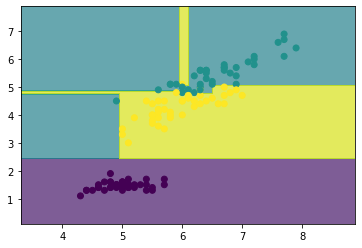

In [215]:
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=.7)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)